In [2]:
#importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

In [3]:
dataset = pd.read_csv("Kidney_disease.csv")

In [4]:
#Checking first 5 rows
dataset.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [5]:
#Doing little data preprocessing
dataset.drop(columns=['id'],axis=1,inplace=True)

In [6]:
print(f"classification has {dataset['classification'].unique()} values in it\n")

classification has ['ckd' 'ckd\t' 'notckd'] values in it



In [7]:
dataset['classification'].replace(to_replace={'ckd\t':'ckd'},inplace=True)

In [8]:
#After a little data preprocessing we converted it in binary problem.
print(f"classification has {dataset['classification'].unique()} values in it\n")

classification has ['ckd' 'notckd'] values in it



In [9]:
# Convert 'rc', 'wc', and 'pcv' columns to float
dataset['rc'] = dataset['rc'].replace('\t','', regex=True) # remove any tab characters if present
dataset['rc'] = dataset['rc'].str.replace('\?', 'NaN') # replace '?' with 'NaN'
dataset['rc'] = dataset['rc'].astype(float)

dataset['wc'] = dataset['wc'].replace('\t','', regex=True) # remove any tab characters if present
dataset['wc'] = dataset['wc'].str.replace('\?', 'NaN') # replace '?' with 'NaN'
dataset['wc'] = dataset['wc'].astype(float)

dataset['pcv'] = dataset['pcv'].replace('\t','', regex=True) # remove any tab characters if present
dataset['pcv'] = dataset['pcv'].str.replace('\?', 'NaN') # replace '?' with 'NaN'
dataset['pcv'] = dataset['pcv'].astype(float)


/var/folders/b7/n0s9q4050pn7xr85dwrlqrwh0000gn/T/ipykernel_8372/769486632.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['rc'] = dataset['rc'].str.replace('\?', 'NaN') # replace '?' with 'NaN'
/var/folders/b7/n0s9q4050pn7xr85dwrlqrwh0000gn/T/ipykernel_8372/769486632.py:7: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['wc'] = dataset['wc'].str.replace('\?', 'NaN') # replace '?' with 'NaN'
/var/folders/b7/n0s9q4050pn7xr85dwrlqrwh0000gn/T/ipykernel_8372/769486632.py:11: FutureWarning: The default value of regex will change from True to False in a future version.
  dataset['pcv'] = dataset['pcv'].str.replace('\?', 'NaN') # replace '?' with 'NaN'


In [10]:
# Identify variables with missing values
missing_values = dataset.isnull().sum()
variables_with_missing = missing_values[missing_values > 0].index.tolist()


In [11]:
variables_with_missing

['age',
 'bp',
 'sg',
 'al',
 'su',
 'rbc',
 'pc',
 'pcc',
 'ba',
 'bgr',
 'bu',
 'sc',
 'sod',
 'pot',
 'hemo',
 'pcv',
 'wc',
 'rc',
 'htn',
 'dm',
 'cad',
 'appet',
 'pe',
 'ane']

In [12]:
dataset.isnull().sum()

age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                71
wc                106
rc                131
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

<Figure size 1200x600 with 0 Axes>

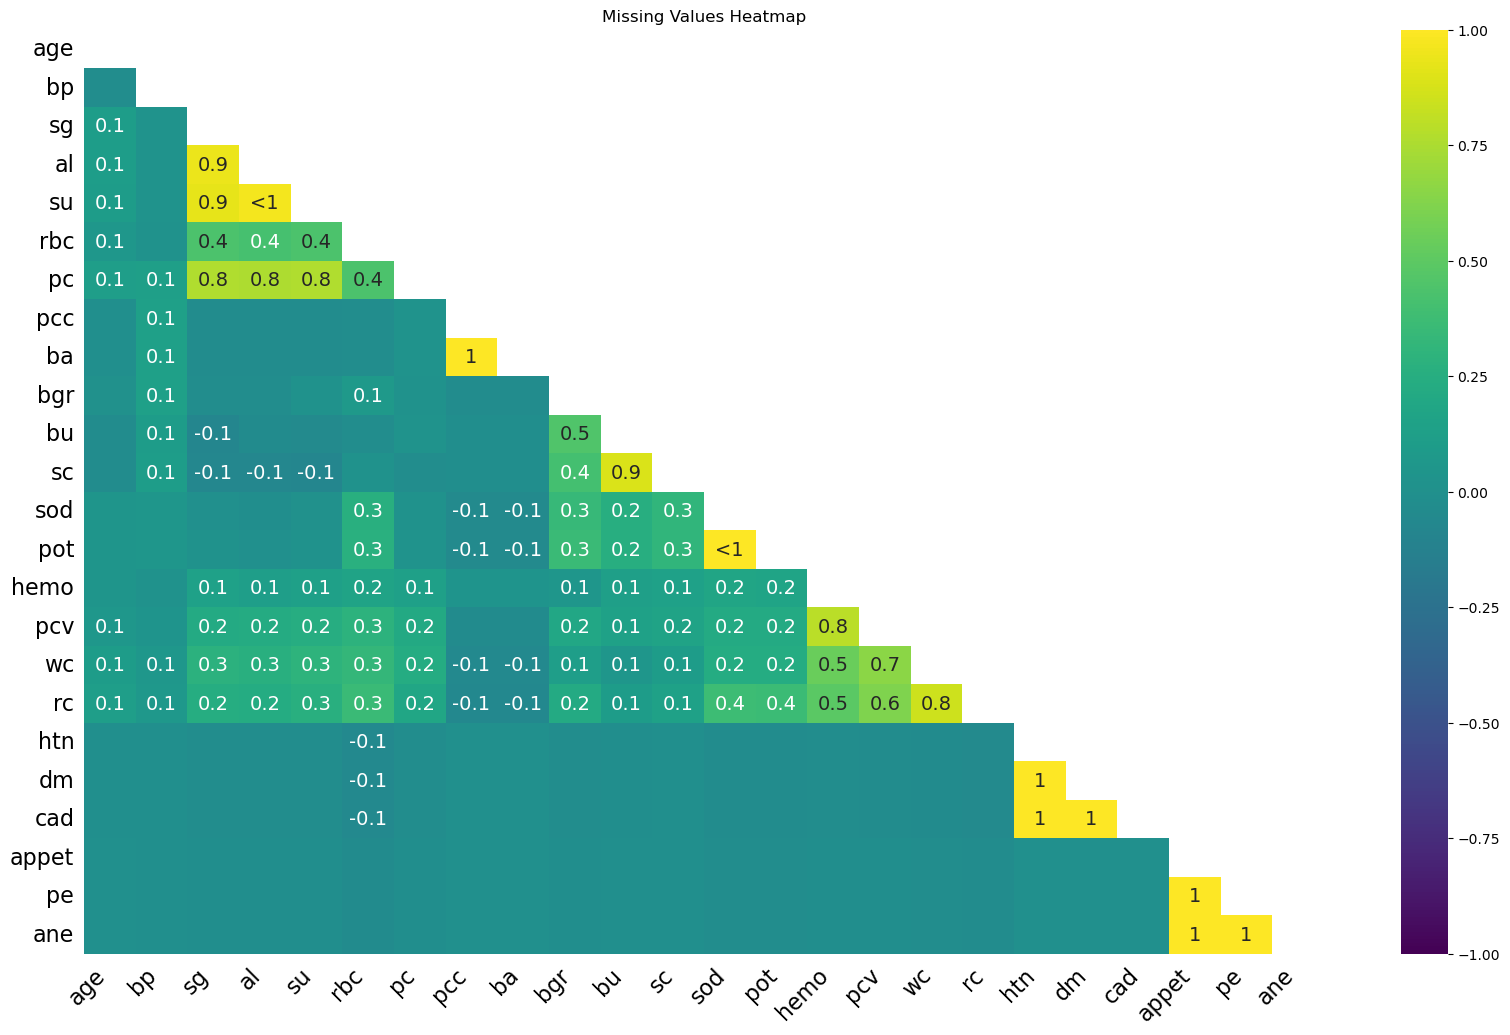

In [13]:
# Visualizing the missing values
plt.figure(figsize=(12, 6))
msno.heatmap(dataset, cmap='viridis')
plt.title('Missing Values Heatmap')
plt.show()

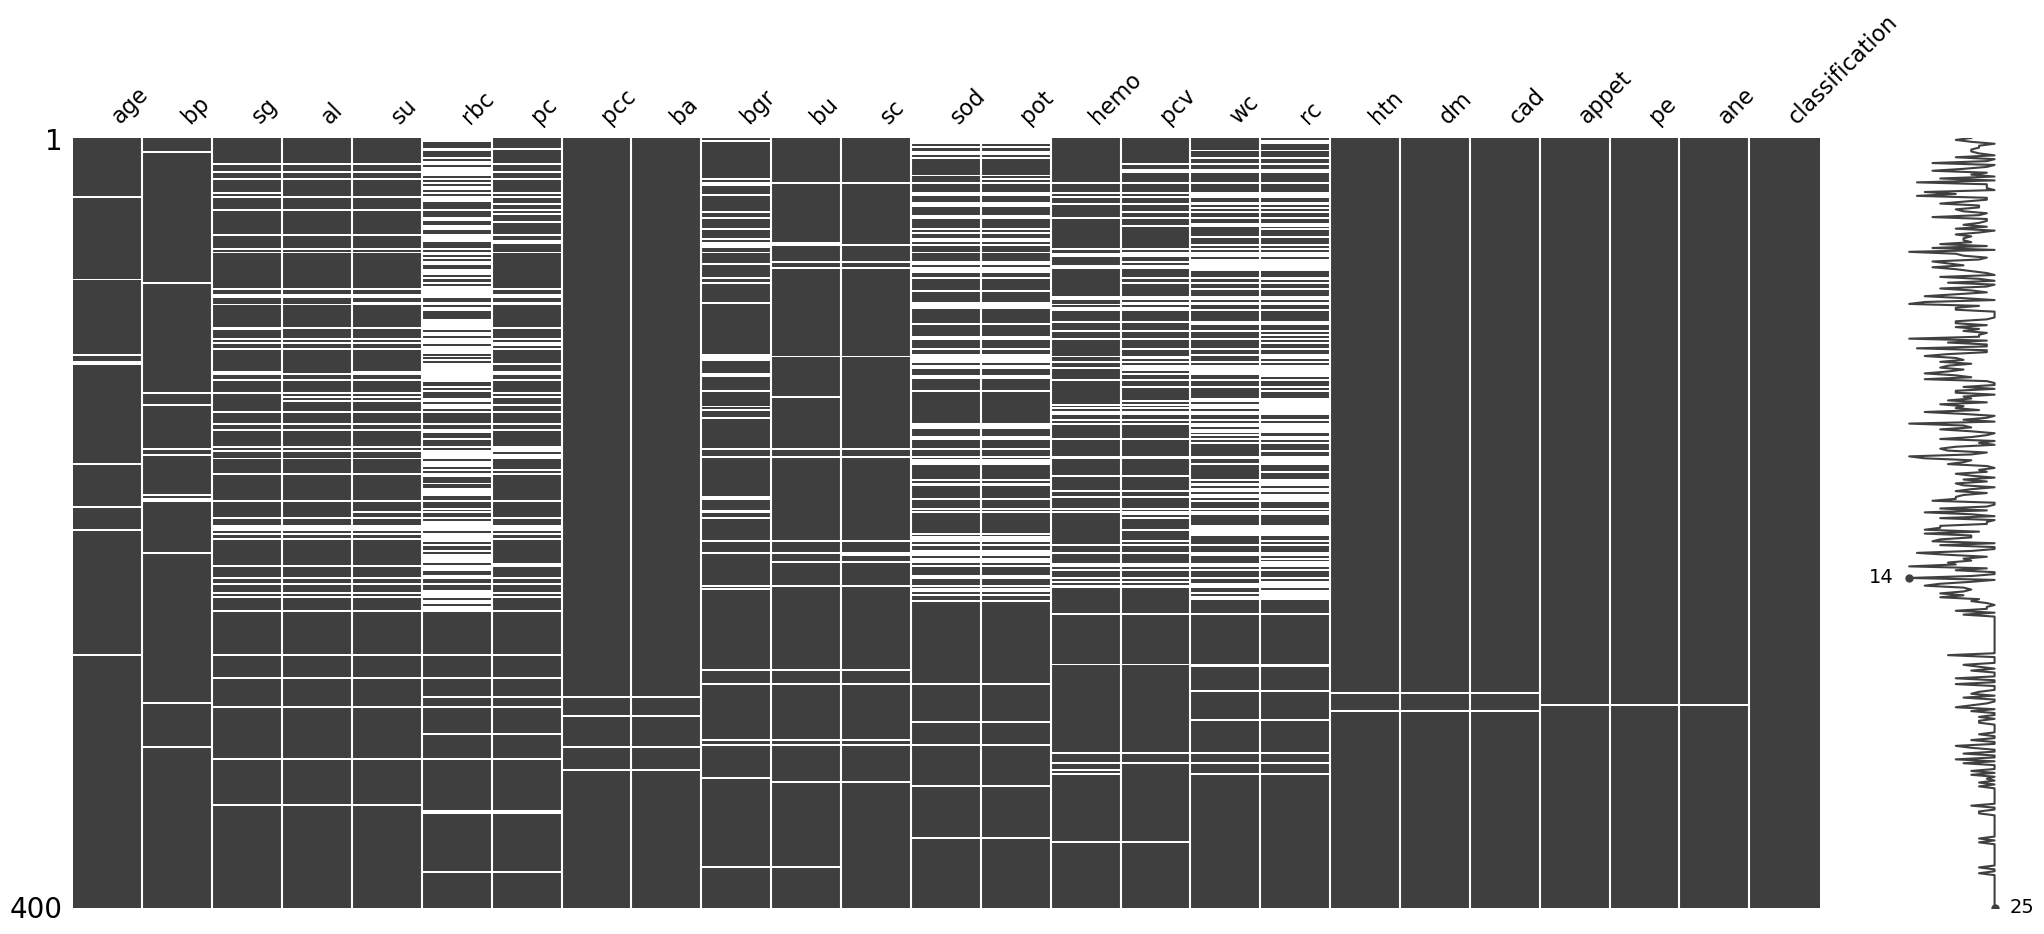

In [14]:
msno.matrix(dataset)
plt.show()

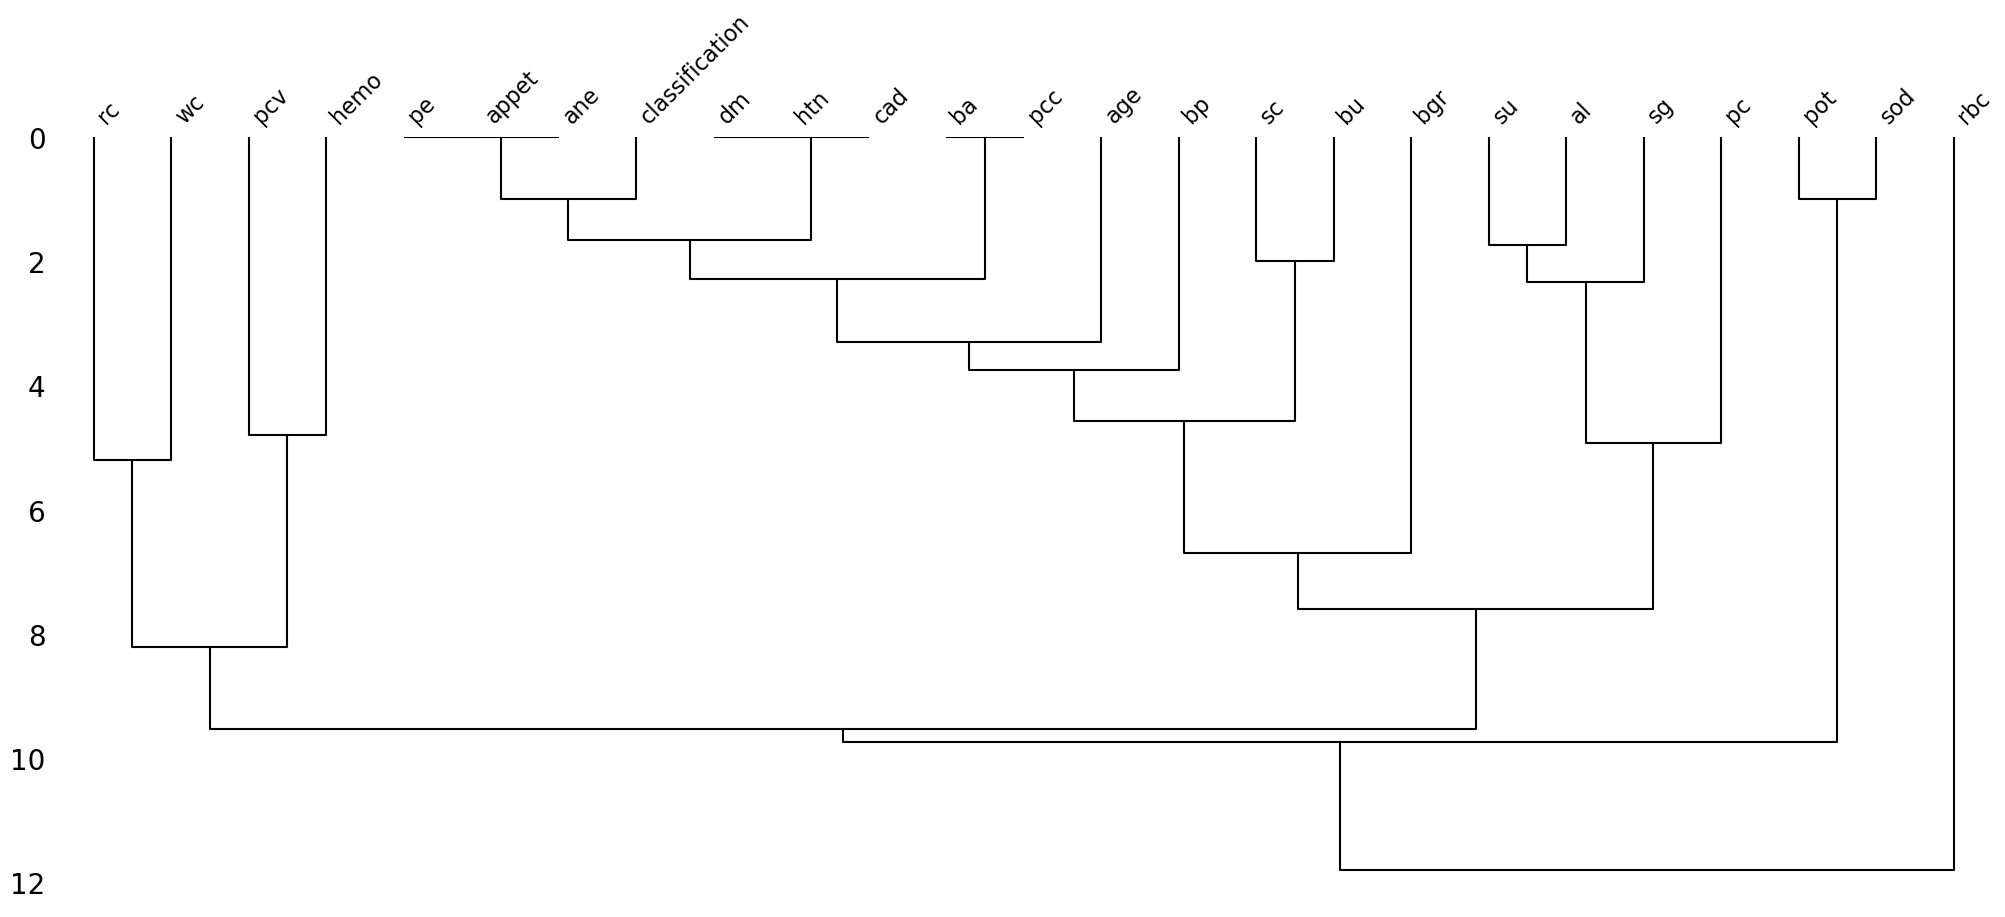

In [17]:
msno.dendrogram(dataset)
plt.show()

In [18]:
missing_percentages = (dataset[variables_with_missing].isnull().sum() / len(dataset)) * 100
print("Percentage of missing values:")
print(missing_percentages)

Percentage of missing values:
age       2.25
bp        3.00
sg       11.75
al       11.50
su       12.25
rbc      38.00
pc       16.25
pcc       1.00
ba        1.00
bgr      11.00
bu        4.75
sc        4.25
sod      21.75
pot      22.00
hemo     13.00
pcv      17.75
wc       26.50
rc       32.75
htn       0.50
dm        0.50
cad       0.50
appet     0.25
pe        0.25
ane       0.25
dtype: float64


In [19]:
#using mean amputation
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')


In [21]:
numerical_vars = dataset.select_dtypes(include=[np.number]).columns
categorical_vars = dataset.select_dtypes(exclude=[np.number]).columns

In [22]:
# Impute missing values for numerical variables with mean
imputer_num = SimpleImputer(strategy='mean')
dataset[numerical_vars] = imputer_num.fit_transform(dataset[numerical_vars])

In [23]:
# Impute missing values for categorical variables with most frequent
imputer_cat = SimpleImputer(strategy='most_frequent')
dataset[categorical_vars] = imputer_cat.fit_transform(dataset[categorical_vars])

In [24]:
missing_values_after = dataset.isnull().sum()
print("\nMissing values after imputation:")
print(missing_values_after)


Missing values after imputation:
age               0
bp                0
sg                0
al                0
su                0
rbc               0
pc                0
pcc               0
ba                0
bgr               0
bu                0
sc                0
sod               0
pot               0
hemo              0
pcv               0
wc                0
rc                0
htn               0
dm                0
cad               0
appet             0
pe                0
ane               0
classification    0
dtype: int64


In [25]:
updated_dataset_path = "updated_kindney.csv"
dataset.to_csv(updated_dataset_path, index=False)

# EDA2 complete now lets move to EDA3 bivariate analysis and then preprocessing and feature analysis
